# **PSO**

PSO found best solution at f([3.18541756 3.12972478])=-1.8083516042208303
Global optimal at f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


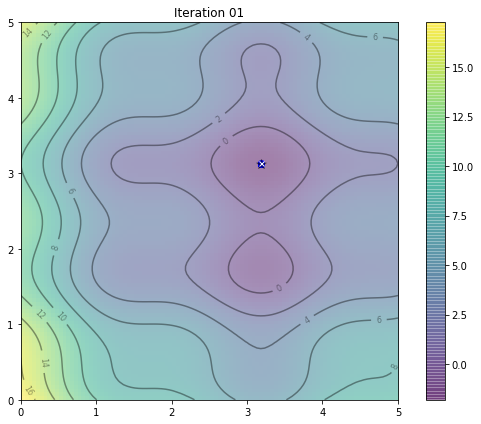

In [ ]:
#masrat

## necessary parameters of pso
#pbest--> Actual best value
#gbest--> explored best value
# V-- vector
#update()--> function to update objective function

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
 
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)
 
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
 
# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8
 
# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1
 
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()
 
def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()
 
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot

from matplotlib.animation import PillowWriter

anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer=PillowWriter(fps=30))
 
print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))


[0.4590536648871132, 0.40222220748397886, 0.5147167292726382]


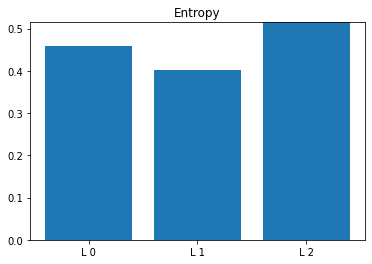

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import entropy

class Particle:
    def __init__(self, n_dimensions):
        self.position = np.random.uniform(low=0, high=1, size=n_dimensions)
        self.velocity = np.zeros(n_dimensions)
        self.best_position = self.position.copy()
        self.best_fitness = np.inf

class PSO:
    def __init__(self, n_particles, n_dimensions, max_iter):
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.max_iter = max_iter
        self.swarm = [Particle(n_dimensions) for _ in range(n_particles)]
        self.gbest_position = np.zeros(n_dimensions)
        self.gbest_fitness = np.inf
    
    def run(self):
        for i in range(self.max_iter):
            for particle in self.swarm:
                fitness = self.evaluate(particle.position)
                if fitness < particle.best_fitness:
                    particle.best_fitness = fitness
                    particle.best_position = particle.position.copy()
                if fitness < self.gbest_fitness:
                    self.gbest_fitness = fitness
                    self.gbest_position = particle.position.copy()
                    
                w =  2
                c1 = 2
                c2 = 2
                
                r1 = np.random.rand(self.n_dimensions)
                r2 = np.random.rand(self.n_dimensions)
                
                particle.velocity = (w * particle.velocity
                                     + c1 * r1 * (particle.best_position - particle.position)
                                     + c2 * r2 * (self.gbest_position - particle.position))
                
                particle.position = particle.position + particle.velocity
            
            yield i, self.gbest_fitness, self.gbest_position
    
    def evaluate(self, position):
        # Create a probability distribution from the position
        p = position / np.sum(position)
        # Compute the entropy of the distribution
        return entropy(p, base=2)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def update(frame):
    for rect, h in zip(rects, heights):
        rect.set_height(h[frame])
    return rects

N = 3
x = np.arange(N)
p = np.random.random(N)

p /= p.sum()
h = [-np.sum(p[i] * np.log2(p[i])) for i in range(N)]
heights = [np.linspace(0, hi, 100) for hi in h]

fig, ax = plt.subplots()
rects = ax.bar(x, np.zeros(N), align='center')
ax.set_ylim(0, max(h))
print(h)
ax.set_xticks(x)
ax.set_xticklabels([f"L {i}" for i in x])
ax.set_title('Entropy')

ani = FuncAnimation(fig, update, frames=len(heights[0]), interval=50, blit=True)
ani.save('entropy.gif', writer=PillowWriter(fps=20))

In [ ]:
!pip install pyswarm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4480 sha256=494dbb70e7fb0c98ffd621346d42cfe1ccf1a61554140d1cb3af87a9f65f72a8
  Stored in directory: /root/.cache/pip/wheels/3b/48/7f/a9f4beb272837304aa8e55fda9c9b4243d23517d5b1349b052
Successfully built pyswarm


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from pyswarm import pso

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define objective function to minimize entropy
def objective_function(weights):
    # Normalize weights to sum up to 1
    weights /= np.sum(weights)

    # Train decision tree classifier with weighted entropy
    clf = DecisionTreeClassifier(criterion='entropy', class_weight=dict(zip(np.unique(y), weights)))

    # Use 10-fold cross validation to evaluate classifier performance
    scores = cross_val_score(clf, X, y, cv=10)

    # Calculate entropy as negative mean cross-validation score
    entropy = -np.mean(scores)
    
    return entropy

# Define bounds for weights
lb = np.zeros(3)
ub = np.ones(3)

# Use PSO to minimize entropy
best_entropy, best_weights = pso(objective_function, lb, ub)

print('Best entropy:', best_entropy)
print('Best weights:', best_weights)

Stopping search: maximum iterations reached --> 100
Best entropy: [0.22613625 0.31484619 0.45901755]
Best weights: -0.9666666666666666


In [ ]:
import numpy as np

# Define the objective function (Shannon entropy)
def entropy(p, w):
    p = p / np.sum(w * p) # normalize probabilities
    return -np.sum(w * p * np.log2(p))

# Define the PSO function
def pso_entropy(p, n_particles=10, n_iterations=100, w_min=0, w_max=1, c1=2, c2=2, w=0.7):
    n_variables = len(p)
    # Initialize particles
    particles = np.random.uniform(w_min, w_max, (n_particles, n_variables))
    velocities = np.zeros((n_particles, n_variables))
    # Initialize personal and global bests
    personal_bests = particles.copy()
    global_best = particles[np.argmax([entropy(p, particles[i]) for i in range(n_particles)])].copy()
    # Initialize best entropy
    best_entropy = entropy(p, global_best)
    # Run PSO iterations
    for i in range(n_iterations):
        for j in range(n_particles):
            # Update velocity
            velocities[j] = w * velocities[j] \
                + c1 * np.random.random() * (personal_bests[j] - particles[j]) \
                + c2 * np.random.random() * (global_best - particles[j])
            # Update position
            particles[j] += velocities[j]
            # Apply bounds
            particles[j] = np.clip(particles[j], w_min, w_max)
            # Evaluate entropy
            particle_entropy = entropy(p, particles[j])
            # Update personal best
            if particle_entropy > entropy(p, personal_bests[j]):
                personal_bests[j] = particles[j].copy()
            # Update global best
            if particle_entropy > best_entropy:
                global_best = particles[j].copy()
                best_entropy = particle_entropy
    # Normalize weights
    global_best = global_best / np.sum(global_best)
    # Return global best as optimal weights
    return global_best, best_entropy

p = np.array([0.38, 0.3, 0.32])
n_particles = 4
n_iterations = 100
w_min = 0
w_max = 1
c1 = 2
c2 = 2
w = 0.7

# Run PSO algorithm
weights, entropy = pso_entropy(p, n_particles, n_iterations, w_min, w_max, c1, c2, w)

print("Optimal weights:", weights)
print("Optimal entropy:", entropy)


Optimal weights: [0.33333333 0.33333333 0.33333333]
Optimal entropy: 1.5775765559836064
